This analysis focuses on customer segmentation for a UK-based online retail company using transactional data from 2010 to 2011 ([Online Retail II Dataset](https://archive.ics.uci.edu/dataset/502/online+retail+ii)). The dataset includes detailed records of purchases, such as invoice numbers, product descriptions, quantities, unit prices, and customer information.

To gain deeper insights into customer behavior and support data-driven marketing strategies, we conducted an RFM (Recency, Frequency, Monetary value) analysis. Based on these metrics, we applied the K-Means clustering algorithm to identify distinct customer profiles according to their purchasing patterns.

The dataset has the following variables:
*  InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
*  StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
*  Description: Product (item) name. Nominal.
*  Quantity: The quantities of each product (item) per transaction. Numeric.
*  InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.
*  UnitPrice: Unit price. Numeric. Product price per unit in sterling (in pounds).
*  CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
*  Country: Country name. Nominal. The name of the country where a customer resides.

In [4]:
import pandas as pd

In [5]:
df=pd.read_excel("/content/online_retail_II.xlsx", sheet_name=0)

In [6]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [8]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [9]:
df.describe(include="O")

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [10]:
pct=df.isna().sum().sort_values(ascending=False).reset_index()
pct.columns=["Columns","Missing Values"]
pct["Pct"]=round(pct["Missing Values"]/len(df),2)
pct[pct["Pct"]>0]

,Columns,Missing Values,Pct
0,Customer ID,107927,0.21
1,Description,2928,0.01


In [11]:
df[df["Customer ID"].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [12]:
df[df["Quantity"]<0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.0,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom


In [13]:
df["Invoice"].str.replace("[0-9]","", regex=True).unique()

array([nan, 'C', 'A'], dtype=object)

In [14]:
df[df["Invoice"].str.startswith("A", na=False)]
#Invoice's numbers that start with A have the purpose the adjust bad debt

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [15]:
df[df["StockCode"].str.match(r"^\d{5}$") == False]["StockCode"].unique()

array(['79323P', '79323W', '48173C', ..., '85049g', '72803b', '79151B'],
      dtype=object)

In [16]:
df[(df["StockCode"].str.match(r"^\d{5}$") == False)]
#"^\d{5}$"
#\d refiere a dígitos numéricos del 0 al 9
#{5} indica que debe haber 5 repeticiones del patrón anterior

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.0,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.0,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom
...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,13969.0,United Kingdom
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75,13969.0,United Kingdom
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,13969.0,United Kingdom
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


In [17]:
df["StockCode"]=df["StockCode"].astype(str)
stock_view=df[(df["StockCode"].str.match(r"^\d{5}$")==False)&(df["StockCode"].str.match(r"^\d{5}[a-zA-Z]+$")==False)]["StockCode"].unique()
#[a-zA-Z] Cualquier letra mayúscula o minúscula
stock_view

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [18]:
#Negative Quantities
#Negative Price
#Null Customer ID
df_stock = {"Var": [], "Row_Q": [], "Desc":[], "Neg_Quantity": [], "Neg_Price": [], "Cero_Price": [], "Null_Customer_ID": []}

for i in stock_view:
    prev = df[df["StockCode"] == i]
    df_stock["Var"].append(i)
    df_stock["Row_Q"].append(len(prev))
    df_stock["Desc"].append(prev["Description"].unique())
    df_stock["Neg_Quantity"].append(len(prev[prev["Quantity"] < 0]))
    df_stock["Neg_Price"].append(len(prev[prev["Price"] < 0]))
    df_stock["Cero_Price"].append(len(prev[prev["Price"] == 0]))
    df_stock["Null_Customer_ID"].append(len(prev[prev["Customer ID"].isna()]))

#df_stock = pd.DataFrame(df_stock)
#df_stock.sort_values(by="Row_Q", ascending=False)

In [19]:
df2=df.copy()

In [20]:
df2["Invoice"]=df2["Invoice"].astype(str)
df2=df2[df2["Invoice"].str.match("^\\d{6}$")==True]

In [21]:
df2["StockCode"]=df2["StockCode"].astype(str)
df2=df2[(df2["StockCode"].str.match("^\\d{5}$")==True) |
 (df2["StockCode"].str.match("^\\d{5}[a-zA-Z]+$")==True) |
  (df2["StockCode"].str.match("^PADS$")==True)]

/tmp/ipython-input-21-2945974580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["StockCode"]=df2["StockCode"].astype(str)


In [22]:
df2.describe

<bound method NDFrame.describe of        Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931               JUMBO STORAGE BAG SUKI         2   

               InvoiceDate  Price  Customer ID         Country  
0      2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3      2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4      2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
...                    ...    ...          ...             ...  
525456 2010-12-09 20:01:00   2.95      17530.0  United Kingdom  
525457 2010-12-09 20:01:00   3.75      17530.0  United Kingdom  
525458 2010-12-09 20:01:00   3.75      17530.0  United Kingdom  
525459 2010-12-09 20:01:00   3.75      17530.0  United Kingdom  
525460 2010-12-09 20:01:00   1.95      17530.0  United Kingdom  

[512796 rows x 8 columns]>

In [23]:
df2.dropna(subset=["Customer ID"], inplace=True)

In [24]:
df2=df2[df2["Price"]>0]

In [25]:
df2.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406309.000000,406309,406309.000000,406309.000000
mean,13.617924,2010-07-01 10:14:25.869572352,2.991668,15373.722268
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,14006.000000
50%,5.000000,2010-07-09 15:48:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,96.998833,NaN,4.285951,1677.329470


In [26]:
df2["Price"].min()

0.001

In [27]:
len(df2)/len(df)

0.7732429238325965

Dropped 23% of records

###Feature Engineering

- Recency
- Frecuency
- Monetary Value

In [28]:
df2["SalesTotal"] = df2["Quantity"] * df2["Price"]

/tmp/ipython-input-28-3156498960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["SalesTotal"] = df2["Quantity"] * df2["Price"]


In [29]:
agreg = df2.groupby("Customer ID", as_index=False).agg(
    Monetary_Value=("SalesTotal", "sum"),
    Frequency=("Invoice", "count"),
    LastInvoiceDate=("InvoiceDate", "max")
)
agreg.head()

,Customer ID,Monetary_Value,Frequency,LastInvoiceDate
0,12346.0,169.36,24,2010-06-28 13:53:00
1,12347.0,1323.32,71,2010-12-07 14:57:00
2,12348.0,221.16,19,2010-09-27 14:59:00
3,12349.0,2221.14,100,2010-10-28 08:23:00
4,12351.0,300.93,21,2010-11-29 15:23:00


In [30]:
last_invoicedate=agreg["LastInvoiceDate"].max()
agreg["Recency"]=(last_invoicedate-agreg["LastInvoiceDate"]).dt.days
agreg.head()

,Customer ID,Monetary_Value,Frequency,LastInvoiceDate,Recency
0,12346.0,169.36,24,2010-06-28 13:53:00,164
1,12347.0,1323.32,71,2010-12-07 14:57:00,2
2,12348.0,221.16,19,2010-09-27 14:59:00,73
3,12349.0,2221.14,100,2010-10-28 08:23:00,42
4,12351.0,300.93,21,2010-11-29 15:23:00,10


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Count')

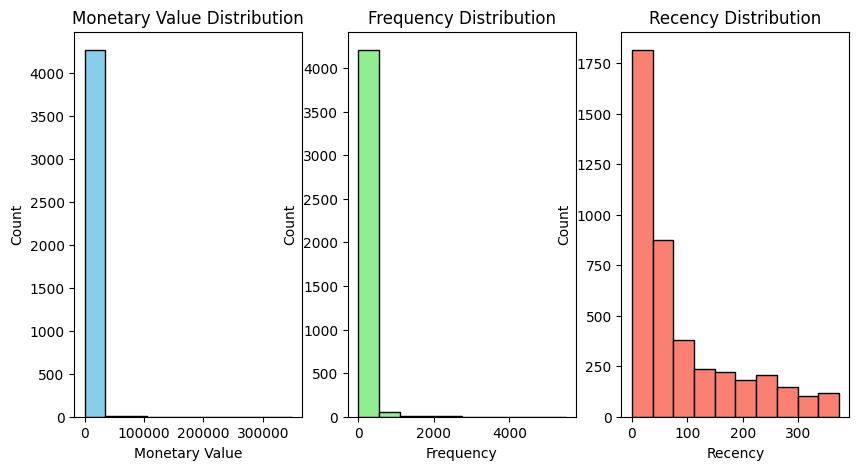

In [32]:
#Checking for outliers
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.hist(agreg["Monetary_Value"], bins=10, color="skyblue", edgecolor="black")
plt.title("Monetary Value Distribution")
plt.xlabel("Monetary Value")
plt.ylabel("Count")

plt.subplot(1,3,2)
plt.hist(agreg["Frequency"], bins=10, color="lightgreen", edgecolor="black")
plt.title("Frequency Distribution")
plt.xlabel("Frequency")
plt.ylabel("Count")

plt.subplot(1,3,3)
plt.hist(agreg["Recency"], bins=10, color="salmon", edgecolor="black")
plt.title("Recency Distribution")
plt.xlabel("Recency")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

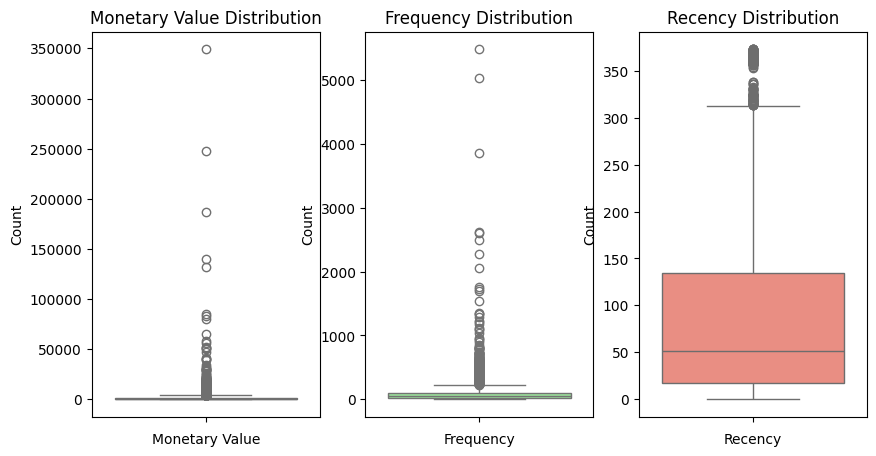

In [33]:
#USAR RANGOS AJUSTADOS DE HUBERT!!!
#Checking for outliers
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
sns.boxplot(data=agreg["Monetary_Value"], color="skyblue")
plt.title("Monetary Value Distribution")
plt.xlabel("Monetary Value")
plt.ylabel("Count")

plt.subplot(1,3,2)
sns.boxplot(data=agreg["Frequency"], color="lightgreen")
plt.title("Frequency Distribution")
plt.xlabel("Frequency")
plt.ylabel("Count")

plt.subplot(1,3,3)
sns.boxplot(data=agreg["Recency"], color="salmon")
plt.title("Recency Distribution")
plt.xlabel("Recency")
plt.ylabel("Count")

In [34]:
#Separate outliers
m_q1=agreg["Monetary_Value"].quantile(0.25)
m_q3=agreg["Monetary_Value"].quantile(0.75)
m_iqr=m_q3-m_q1
monetary_outliers=agreg[(agreg["Monetary_Value"]<(m_q1-1.5*m_iqr)) | (agreg["Monetary_Value"]>(m_q3+1.5*m_iqr))]

In [35]:
#Separate outliers
f_q1=agreg["Frequency"].quantile(0.25)
f_q3=agreg["Frequency"].quantile(0.75)
f_iqr=f_q3-f_q1
frequency_outliers=agreg[(agreg["Frequency"]<(f_q1-1.5*f_iqr)) | (agreg["Frequency"]>(f_q3+1.5*f_iqr))]

In [36]:
no_outliers=agreg[~agreg.index.isin(monetary_outliers.index) & ~agreg.index.isin(frequency_outliers.index)]

In [37]:
no_outliers.describe()

,Customer ID,Monetary_Value,Frequency,LastInvoiceDate,Recency
count,3697.000000,3697.000000,3697.000000,3697,3697.000000
mean,15366.334866,851.763840,52.430078,2010-09-01 17:48:59.156072192,98.808764
min,12346.000000,1.550000,1.000000,2009-12-01 10:49:00,0.000000
25%,13891.000000,270.800000,16.000000,2010-07-06 09:39:00,23.000000
50%,15371.000000,560.070000,36.000000,2010-10-11 14:19:00,59.000000
75%,16859.000000,1199.310000,74.000000,2010-11-16 18:30:00,156.000000
max,18287.000000,3788.210000,230.000000,2010-12-09 20:01:00,373.000000
std,1701.417411,796.451312,48.857931,NaN,98.673425


Text(0, 0.5, 'Count')

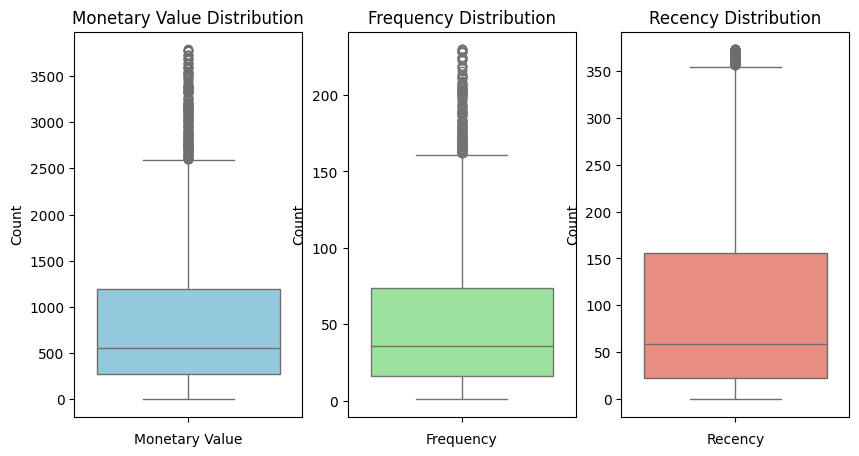

In [38]:
#USAR RANGOS AJUSTADOS DE HUBERT!!!
#Checking for outliers
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
sns.boxplot(data=no_outliers["Monetary_Value"], color="skyblue")
plt.title("Monetary Value Distribution")
plt.xlabel("Monetary Value")
plt.ylabel("Count")

plt.subplot(1,3,2)
sns.boxplot(data=no_outliers["Frequency"], color="lightgreen")
plt.title("Frequency Distribution")
plt.xlabel("Frequency")
plt.ylabel("Count")

plt.subplot(1,3,3)
sns.boxplot(data=no_outliers["Recency"], color="salmon")
plt.title("Recency Distribution")
plt.xlabel("Recency")
plt.ylabel("Count")

###Scaled Data

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(no_outliers[["Monetary_Value", "Frequency", "Recency"]])

In [41]:
scaled_datadf=pd.DataFrame(scaled_data, index=no_outliers.index, columns=["Monetary_Value", "Frequency", "Recency"])
scaled_datadf.head()

,Monetary_Value,Frequency,Recency
0,-0.856921,-0.581972,0.660766
1,0.592152,0.380131,-0.981235
2,-0.791874,-0.684323,-0.261593
3,1.719580,0.973769,-0.575803
4,-0.691704,-0.643382,-0.900149


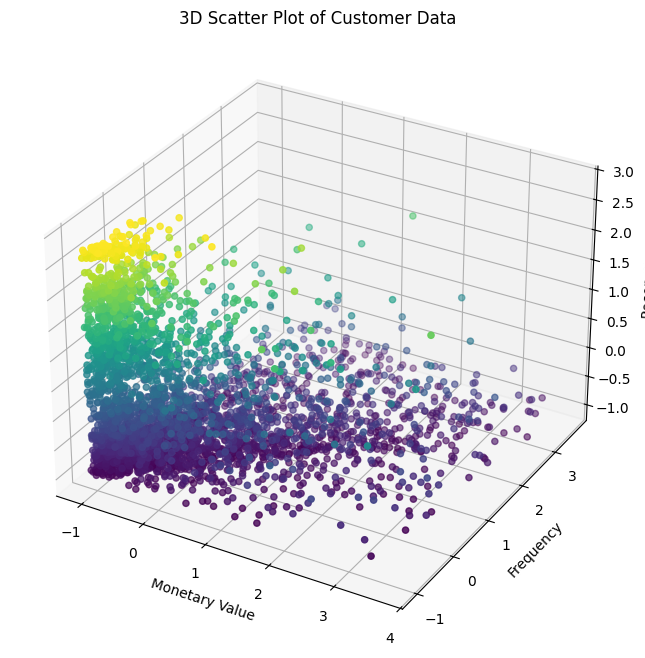

In [42]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(projection="3d")
scatter=ax.scatter(scaled_datadf["Monetary_Value"], scaled_datadf["Frequency"], scaled_datadf["Recency"], c=scaled_datadf["Recency"], cmap="viridis")
ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")
ax.set_title("3D Scatter Plot of Customer Data")
plt.show()

###KMeans Clustering

####Elbow method

In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


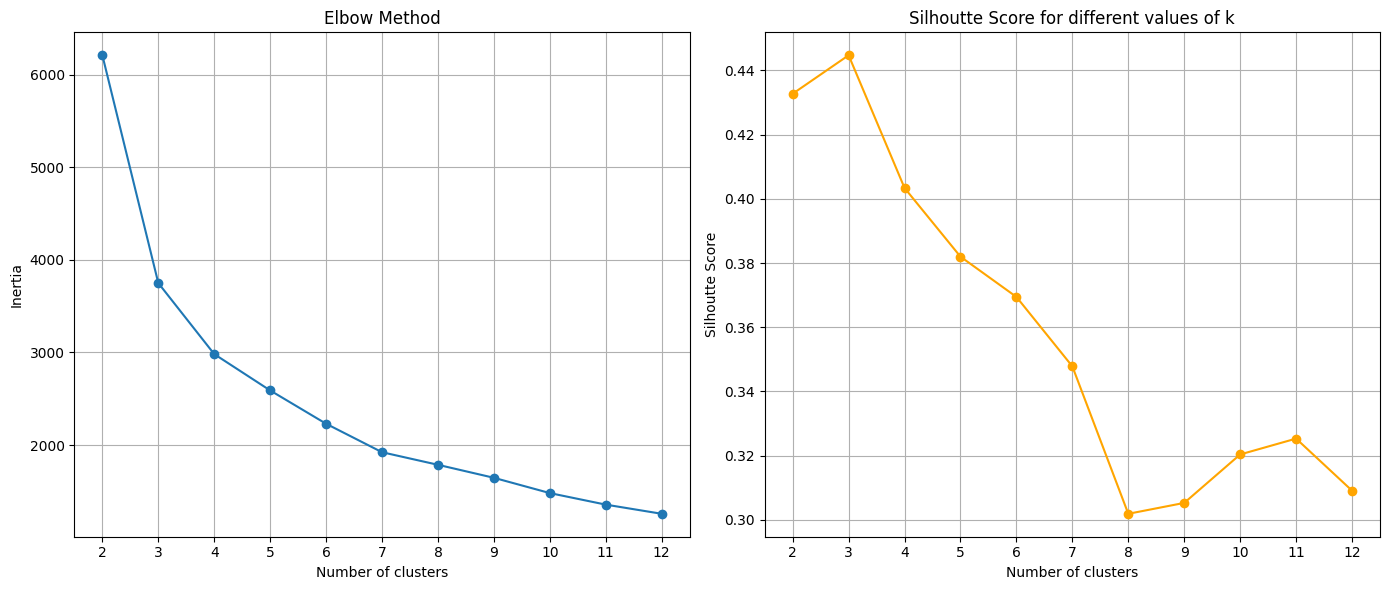

In [44]:
max_k=12
inertias = []
silhoutte_scores = []
k_values=range(2, max_k+1)

for k in k_values:
    k_means = KMeans(
                        n_clusters = k,
                        max_iter = 1000,
                        random_state = 123
                    )
    k_means.fit_predict(scaled_datadf)
    sil_score=silhouette_score(scaled_datadf, k_means.labels_)
    silhoutte_scores.append(sil_score)
    inertias.append(k_means.inertia_)

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.plot(k_values, inertias, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(k_values, silhoutte_scores, marker='o', color="orange")
plt.title("Silhoutte Score for different values of k")
plt.xlabel("Number of clusters")
plt.ylabel("Silhoutte Score")
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

plt.show()

In [45]:
kmeans=KMeans(n_clusters=4, random_state=123, max_iter=1000)
cluster_labels=kmeans.fit_predict(scaled_datadf)
cluster_labels

array([0, 1, 2, ..., 0, 1, 1], dtype=int32)

In [46]:
no_outliers["Cluster"]=cluster_labels

/tmp/ipython-input-46-1125245120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_outliers["Cluster"]=cluster_labels


/tmp/ipython-input-47-3294605779.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


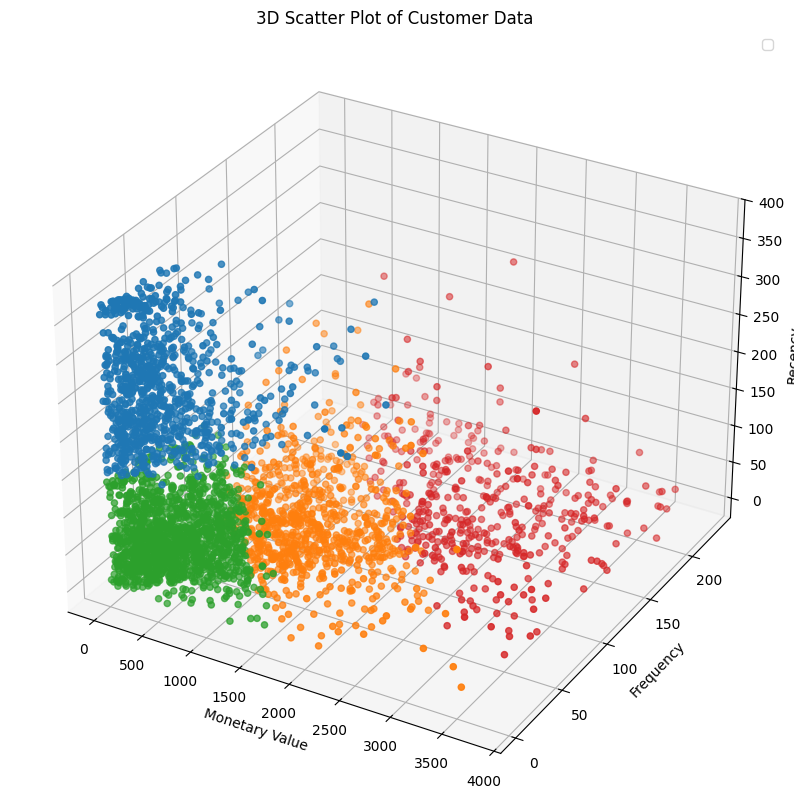

In [47]:
cluster_colors={0:"#1f77b4",
                1:"#ff7f0e",
                2:"#2ca02c",
                3:"#d62728"}

colors=no_outliers["Cluster"].map(cluster_colors)
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(projection="3d")
scatte=ax.scatter(no_outliers["Monetary_Value"], no_outliers["Frequency"], no_outliers["Recency"], c=colors, marker="o")

ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")
ax.set_title("3D Scatter Plot of Customer Data")
plt.legend()
plt.show()


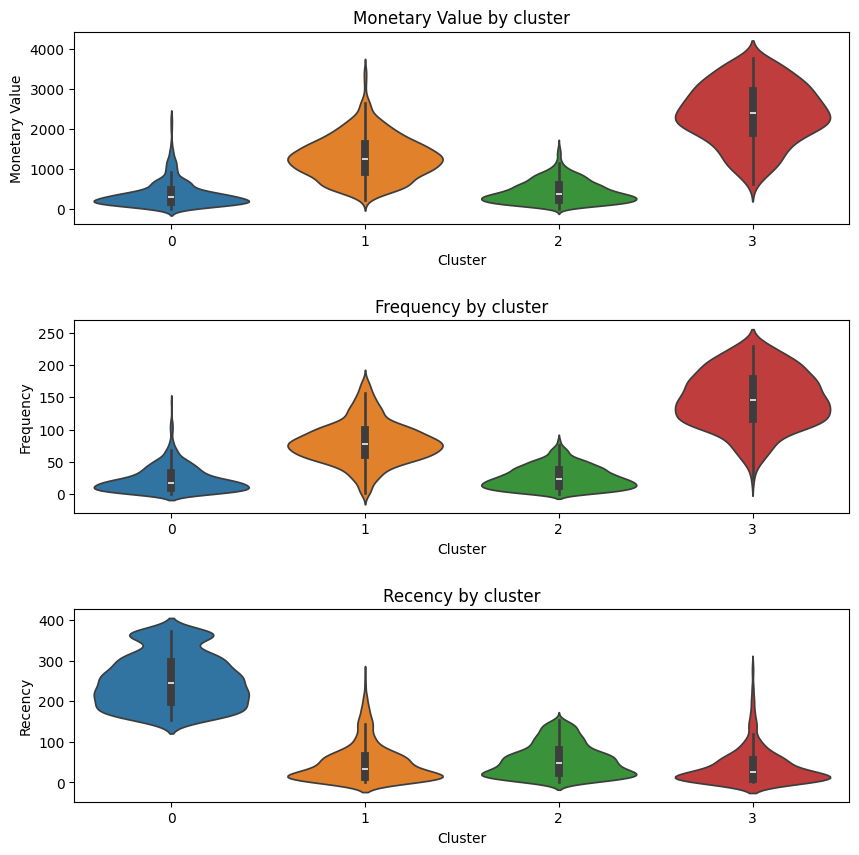

In [48]:
plt.figure(figsize=(10, 10))

ax1 = plt.subplot(3, 1, 1)
sns.violinplot(x="Cluster", y="Monetary_Value", data=no_outliers, palette=cluster_colors, hue="Cluster", ax=ax1)
ax1.set_title("Monetary Value by cluster")
ax1.set_ylabel("Monetary Value")
ax1.get_legend().remove()

ax2 = plt.subplot(3, 1, 2)
sns.violinplot(x="Cluster", y="Frequency", data=no_outliers, palette=cluster_colors, hue="Cluster", ax=ax2)
ax2.set_title("Frequency by cluster")
ax2.set_ylabel("Frequency")
ax2.get_legend().remove()

ax3 = plt.subplot(3, 1, 3)
sns.violinplot(x="Cluster", y="Recency", data=no_outliers, palette=cluster_colors, hue="Cluster", ax=ax3)
ax3.set_title("Recency by cluster")
ax3.set_ylabel("Recency")
ax3.get_legend().remove()

plt.subplots_adjust(hspace=0.5)
plt.show()

In [49]:
overlap_indices=monetary_outliers.index.intersection(frequency_outliers.index)
monetary_only_outliers = monetary_outliers.drop(overlap_indices)
frequency_only_outliers = frequency_outliers.drop(overlap_indices)
monet_and_frequency_outliers = monetary_outliers.loc[overlap_indices]

monetary_only_outliers["Cluster"]=-1
frequency_only_outliers["Cluster"]=-2
monet_and_frequency_outliers["Cluster"]=-3

In [50]:
outlier_clusters = pd.concat([monetary_only_outliers, frequency_only_outliers, monet_and_frequency_outliers])
outlier_clusters

,Customer ID,Monetary_Value,Frequency,LastInvoiceDate,Recency,Cluster
9,12357.0,11229.99,164,2010-11-16 10:05:00,23,-1
25,12380.0,4782.84,167,2010-08-31 14:54:00,100,-1
42,12409.0,12346.62,155,2010-10-15 10:24:00,55,-1
48,12415.0,19468.84,209,2010-11-29 15:07:00,10,-1
61,12431.0,4145.52,167,2010-12-01 10:03:00,8,-1
...,...,...,...,...,...,...
4235,18223.0,7516.31,304,2010-11-17 12:20:00,22,-3
4236,18225.0,7545.14,308,2010-12-09 15:46:00,0,-3
4237,18226.0,6650.83,286,2010-11-26 15:51:00,13,-3
4241,18231.0,4791.80,260,2010-10-29 14:17:00,41,-3


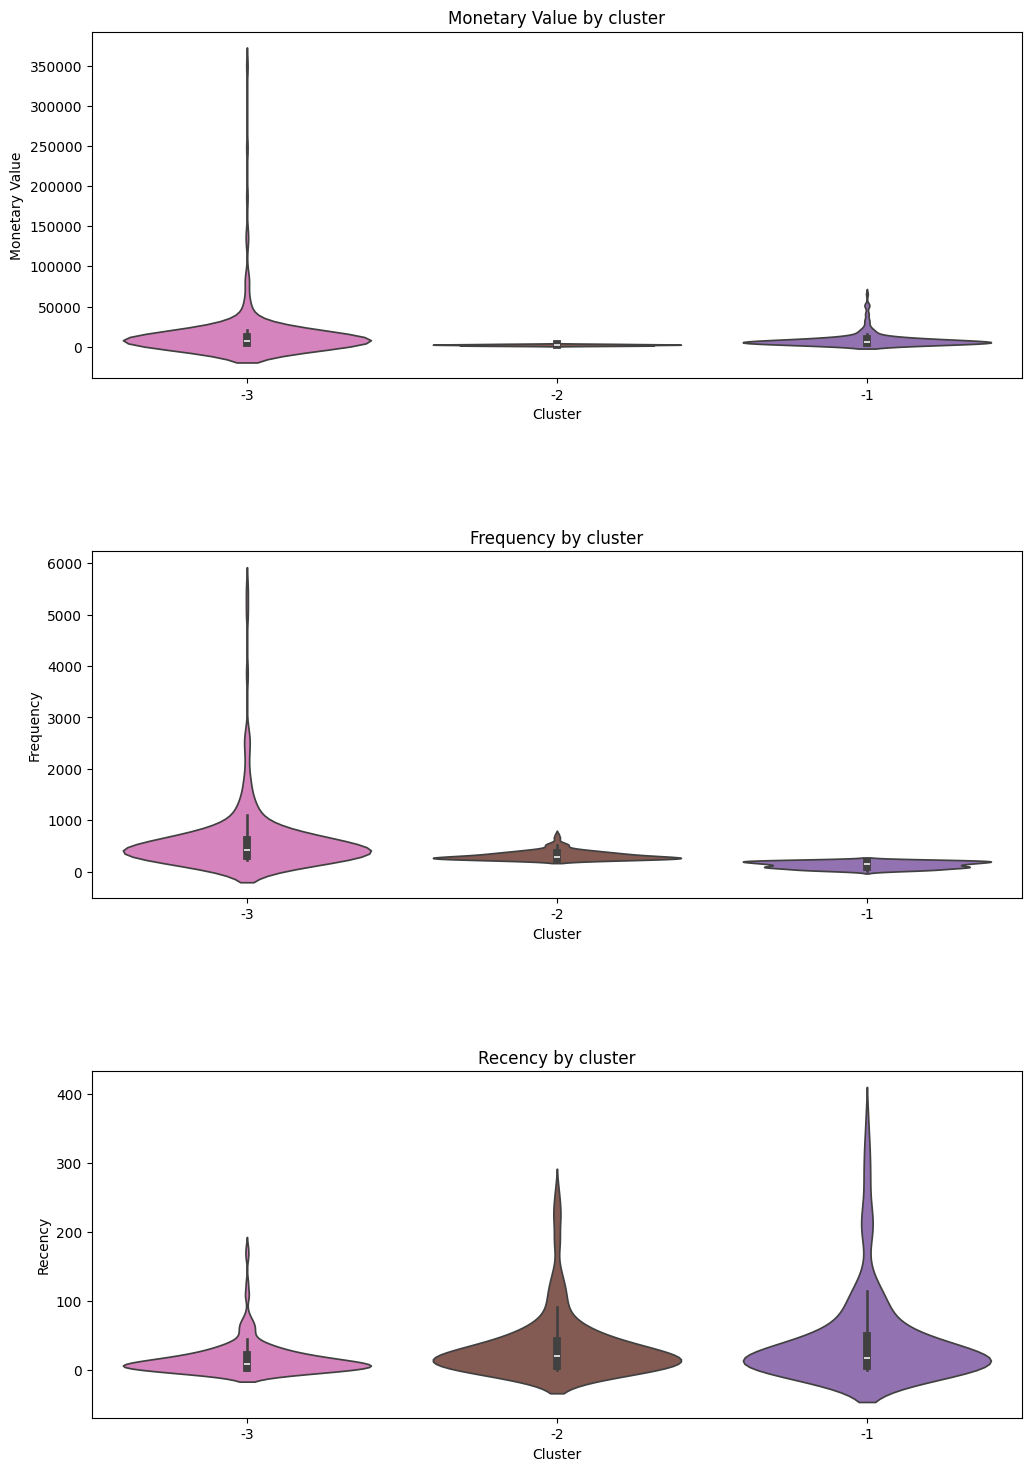

In [51]:
cluster_colors={-1:"#9467bd",
                -2:"#8c564b",
                -3:"#e377c2"}

plt.figure(figsize=(12, 18))

ax1 = plt.subplot(3, 1, 1)
sns.violinplot(x="Cluster", y="Monetary_Value", data=outlier_clusters, palette=cluster_colors, hue="Cluster", ax=ax1)
ax1.set_title("Monetary Value by cluster")
ax1.set_ylabel("Monetary Value")
ax1.get_legend().remove()

ax2 = plt.subplot(3, 1, 2)
sns.violinplot(x="Cluster", y="Frequency", data=outlier_clusters, palette=cluster_colors, hue="Cluster", ax=ax2)
ax2.set_title("Frequency by cluster")
ax2.set_ylabel("Frequency")
ax2.get_legend().remove()

ax3 = plt.subplot(3, 1, 3)
sns.violinplot(x="Cluster", y="Recency", data=outlier_clusters, palette=cluster_colors, hue="Cluster", ax=ax3)
ax3.set_title("Recency by cluster")
ax3.set_ylabel("Recency")
ax3.get_legend().remove()

plt.subplots_adjust(hspace=0.5)
plt.show()

In [52]:
cluster_labels = {
    0: "Inactive Shoppers",
    1: "Loyal Spenders",
    2: "Frequent Low Spenders",
    3: "Top-tier VIPs",
    -1: "Occasional Big Spenders",
    -2: "Frequent Small Spenders",
    -3: "Power Buyers"
}

In [54]:
full_clustering=pd.concat([no_outliers, outlier_clusters])
full_clustering["ClusterLabel"]=full_clustering["Cluster"].map(cluster_labels)
full_clustering

,Customer ID,Monetary_Value,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
0,12346.0,169.36,24,2010-06-28 13:53:00,164,0,Inactive Shoppers
1,12347.0,1323.32,71,2010-12-07 14:57:00,2,1,Loyal Spenders
2,12348.0,221.16,19,2010-09-27 14:59:00,73,2,Frequent Low Spenders
3,12349.0,2221.14,100,2010-10-28 08:23:00,42,3,Top-tier VIPs
4,12351.0,300.93,21,2010-11-29 15:23:00,10,2,Frequent Low Spenders
...,...,...,...,...,...,...,...
4235,18223.0,7516.31,304,2010-11-17 12:20:00,22,-3,Power Buyers
4236,18225.0,7545.14,308,2010-12-09 15:46:00,0,-3,Power Buyers
4237,18226.0,6650.83,286,2010-11-26 15:51:00,13,-3,Power Buyers
4241,18231.0,4791.80,260,2010-10-29 14:17:00,41,-3,Power Buyers


/tmp/ipython-input-65-303480296.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


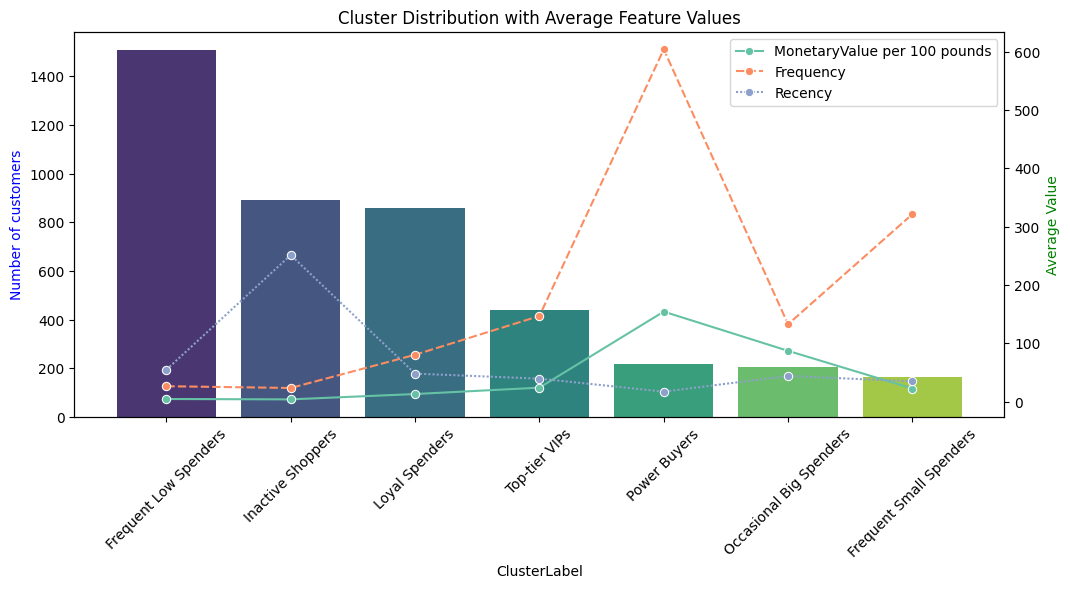

In [65]:
cluster_counts=full_clustering["ClusterLabel"].value_counts()
full_clustering["MonetaryValue per 100 pounds"] = full_clustering["Monetary_Value"] / 100.00
feature_means=full_clustering.groupby("ClusterLabel")[["MonetaryValue per 100 pounds", "Frequency", "Recency"]].mean()

fig, ax1=plt.subplots(figsize=(12,5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette="viridis", hue=cluster_counts.index)
ax1.set_ylabel("Number of customers", color="b")
ax1.set_title("Cluster Distribution with Average Feature Values")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

ax2=ax1.twinx()
sns.lineplot(data=feature_means, ax=ax2, palette="Set2", marker="o")
ax2.set_ylabel("Average Value", color="g")

plt.show()

Customer Segmentation:

**Cluster 0 (Blue)**: Represents the least active customers, who have not made recent purchases and whose transactions are of low value.
- Implement re-engagement programs, such as personalized discounts and reminder emails, to bring them back.

**Cluster 1 (Orange)**: Includes customers who purchase frequently, spend significant amounts, and have made recent transactions.
- Focus on retention with exclusive offers and personalized loyalty rewards to keep them engaged.

**Cluster 2 (Green)**: Represents customers who buy regularly but spend relatively small amounts. They have also made recent purchases.
- Apply upselling and bundling strategies to encourage higher spending per transaction.

**Cluster 3 (Red)**: This segment includes customers who not only purchase frequently and spend large amounts but have also bought products recently.
- Provide them with a VIP services: early access to products, loyalty rewards and personalized recognition to strengthen loyalty.

**Cluster -1 (Monetary Outliers)**: Represents clients who make large purchases but not frequently.
- Encourage more frequent engagement through limited-time offers, loyalty incentives, and reminders to maintain top-of-mind awareness.

**Cluster -2 (Frequency Outliers)**: Customers who buy frequently but make small purchases.
- Promote product bundles or volume discounts to increase their average transaction value.

**Cluster -3 (Monetary and Frequency Outliers)**: Represents clients whose purchases are large and frequent.
- Prioritize them as premium customers. Offer VIP programs, personalized services, and exclusive deals to retain and reward their loyalty.

